In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
     

In [ ]:
from sklearn.model_selection import train_test_split
x = data.drop(columns='Class', axis=1)
y = data['Class']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, stratify=y, shuffle=True, random_state=10)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, recall_score, precision_score ,average_precision_score, precision_recall_curve, f1_score
     

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost
from xgboost import XGBClassifier

In [ ]:
classifier = xgboost.XGBClassifier()


In [ ]:
params = {
 "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
 "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [ ]:
rs_model=RandomizedSearchCV(classifier,param_distributions=params,
                            n_iter=5,scoring='recall',n_jobs=-1,cv=5,verbose=3)

In [ ]:
rs_model.fit(train_x,train_y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='recall', verbose=3)

In [ ]:
rs_model.best_estimator_

XGBClassifier(colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=6,
              min_child_weight=5)

In [ ]:
model=XGBClassifier(colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=12,
              min_child_weight=3)

In [ ]:
model.fit(train_x,train_y)

XGBClassifier(colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=12,
              min_child_weight=3)

# Results



In [ ]:
pred = model.predict(test_x)
print (classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.97      0.79      0.87       123

    accuracy                           1.00     71202
   macro avg       0.98      0.89      0.93     71202
weighted avg       1.00      1.00      1.00     71202



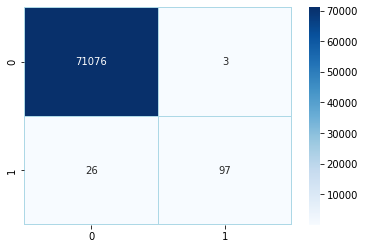

In [ ]:
cf_matrix = confusion_matrix(test_y, pred)
sns.heatmap(cf_matrix, annot=True, linewidths=0.1, cmap="Blues", fmt='d', linecolor='lightblue')

In [ ]:
precision_recall= average_precision_score(test_y, pred)
precision = precision_score(test_y, pred)
recall = recall_score(test_y, pred)
auc  = roc_auc_score(test_y, pred)
f1 = f1_score(test_y, pred)

print('AUC: ', np.mean(auc))
print('Precision: ', np.mean(precision))
print('Recall: ', np.mean(recall))
print('Precision-Recall: ', np.mean(precision_recall))
print('F1-score: ', np.mean(f1))

AUC:  0.8942878398099812
Precision:  0.97
Recall:  0.7886178861788617
Precision-Recall:  0.7653245078755666
F1-score:  0.8699551569506726


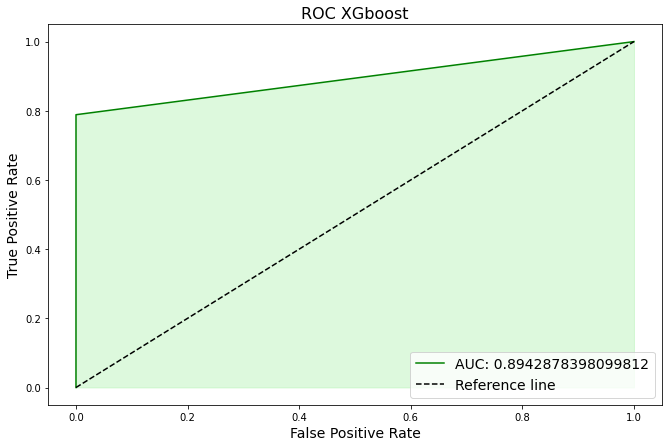

In [ ]:
roc_auc_xgboost = np.mean(auc)
fpr_xgboost, tpr_xgboost, thresholds_xgboost = roc_curve(test_y, pred)

# plot 
plt.figure(figsize=(11,7))
plt.plot(fpr_xgboost, tpr_xgboost, color='green', label='AUC: {}'.format(roc_auc_xgboost))
plt.fill_between(fpr_xgboost, tpr_xgboost, color='lightgreen', alpha=0.3)
plt.plot([0,1], [0,1], color='black', ls='--', label='Reference line')
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC XGboost', fontsize=16)
plt.legend(loc=4, fontsize=14)
plt.grid(False)
plt.show()

0.8500111204870963

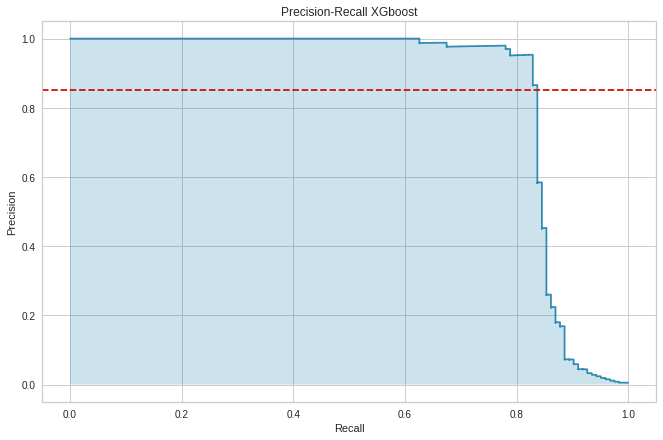

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve, ConfusionMatrix
# Precision-Recall 
# yellowbrick 이용
plt.figure(figsize=(11,7))
plt.title('Precision-Recall XGboost')
plt.xlabel('Recall')
plt.ylabel('Precision')
prcur = PrecisionRecallCurve(model)
prcur.fit(train_x, train_y)
prcur.score(test_x, test_y)

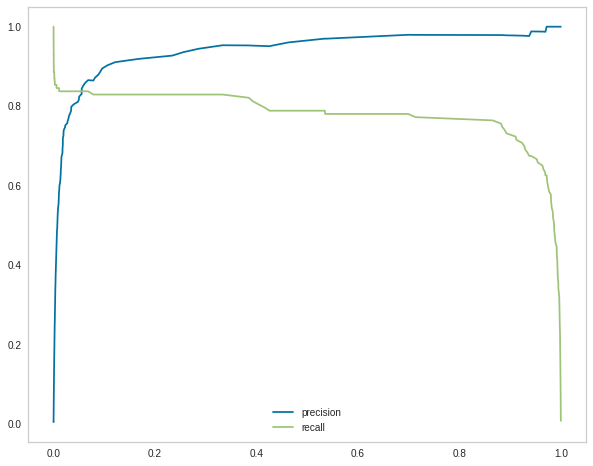

In [ ]:

#default threshold = 0.5
plt.figure(figsize=(10, 8))
pred_prob = model.predict_proba(test_x)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(test_y, pred_prob)
plt.plot(thresholds, precisions[:len(thresholds)], label='precision')
plt.plot(thresholds, recalls[:len(thresholds)], label='recall')
plt.grid()
plt.legend()
plt.show()
     